In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
np.random.seed(123) #ensure reproducibility
pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [2]:


# reading csv files
dt =  pd.read_csv('processed.cleveland.data', sep=",")
dt.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
              'max_heart_rate_achieved',
               'exercise_induced_angina', 'st_depression', 'st_slope', 
              'num_major_vessels', 'thalassemia', 'target']



In [3]:
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'


dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'

dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')

In [4]:
dt['target'] = np.where(dt['target'] !=0,1, dt['target'])
dt.dtypes
dt = pd.get_dummies(dt, drop_first=True)
dt.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,...,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,num_major_vessels_1.0,num_major_vessels_2.0,num_major_vessels_3.0,num_major_vessels_?,thalassemia_6.0,thalassemia_7.0,thalassemia_?
0,67.0,160.0,286.0,108.0,1.5,1,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,67.0,120.0,229.0,129.0,2.6,1,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
2,37.0,130.0,250.0,187.0,3.5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,56.0,120.0,236.0,178.0,0.8,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
dt.info()
dt.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age                                      302 non-null    float64
 1   resting_blood_pressure                   302 non-null    float64
 2   cholesterol                              302 non-null    float64
 3   max_heart_rate_achieved                  302 non-null    float64
 4   st_depression                            302 non-null    float64
 5   target                                   302 non-null    int64  
 6   sex_male                                 302 non-null    uint8  
 7   chest_pain_type_atypical angina          302 non-null    uint8  
 8   chest_pain_type_non-anginal pain         302 non-null    uint8  
 9   chest_pain_type_typical angina           302 non-null    uint8  
 10  fasting_blood_sugar_lower than 120mg/ml  302 non-n

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,...,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,num_major_vessels_1.0,num_major_vessels_2.0,num_major_vessels_3.0,num_major_vessels_?,thalassemia_6.0,thalassemia_7.0,thalassemia_?
0,67.0,160.0,286.0,108.0,1.5,1,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,67.0,120.0,229.0,129.0,2.6,1,1,0,0,0,...,1,1,0,0,1,0,0,0,1,0
2,37.0,130.0,250.0,187.0,3.5,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,41.0,130.0,204.0,172.0,1.4,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,56.0,120.0,236.0,178.0,0.8,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0


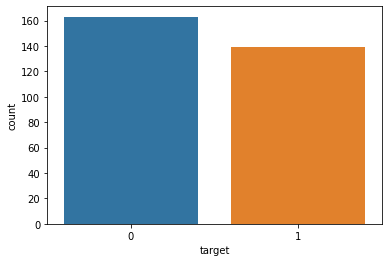

NameError: name 'df' is not defined

In [6]:
sns.countplot(x="target", data=dt)
plt.show()
df["sex"].value_counts()
sns.countplot(x="sex", data=df)
plt.show()

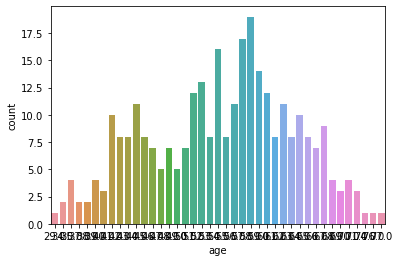

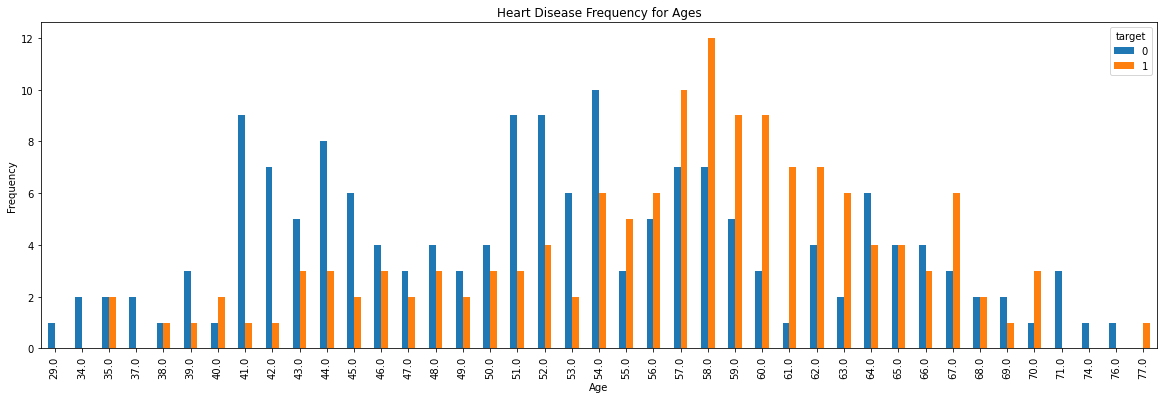

In [22]:
sns.countplot(x="age", data=dt)
plt.show()
pd.crosstab(dt.age,dt.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


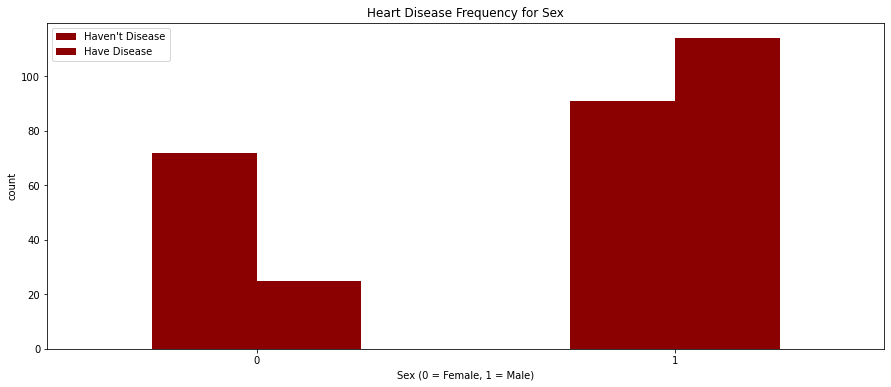

In [18]:
pd.crosstab(dt.sex_male,dt.target).plot(kind="bar",figsize=(15,6),color='DarkRed')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('count')
plt.show()

In [19]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution")
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

NameError: name 'df' is not defined

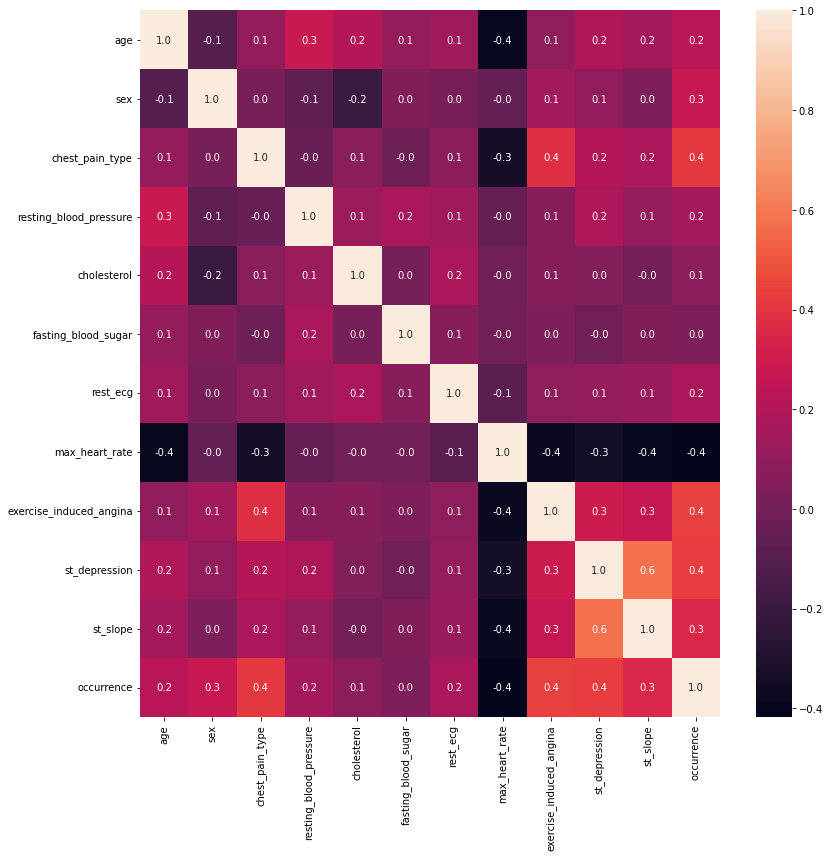

In [21]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [51]:

y = df.target.values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

NameError: name 'x' is not defined

In [69]:
#logit regressionimport pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

X = np.asarray(dt[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
              'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
              'max_heart_rate_achieved',
               'exercise_induced_angina', 'st_depression', 'st_slope', 
              'num_major_vessels', 'thalassemia']])
y = np.asarray(dt['target'])
 
# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)


Train set: (151, 13) (151,)
Test set: (151, 13) (151,)


ValueError: could not convert string to float: '?'

NameError: name 'x_train' is not defined